# Importation des librairies

In [2]:
# Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import ttest_ind, chi2_contingency, f_oneway, skew, kurtosis

# Configuration des visualisations
sns.set_style("whitegrid")
sns.set_palette('pastel')

type_colors = {
    'Normal': '#A8A878',    # Beige
    'Fire': '#F08030',      # Orange-red
    'Water': '#6890F0',     # Blue
    'Electric': '#F8D030',  # Yellow
    'Grass': '#78C850',     # Green
    'Ice': '#98D8D8',       # Light blue
    'Fighting': '#C03028',  # Dark red
    'Poison': '#A040A0',    # Purple
    'Ground': '#E0C068',    # Brown
    'Flying': '#A890F0',    # Light purple
    'Psychic': '#F85888',   # Pink
    'Bug': '#A8B820',       # Light green
    'Rock': '#B8A038',      # Dark brown
    'Ghost': '#705898',     # Purple-grey
    'Dragon': '#7038F8',    # Dark blue-purple
    'Dark': '#705848',      # Dark grey-brown
    'Steel': '#B8B8D0',     # Light grey
    'Fairy': '#EE99AC'      # Light pink
}

# 🧼 Chargement et aperçu du jeu de données

In [14]:
df = pd.read_csv("data/MP-24-25_clean.csv")
df.shape
df.head()

,pokedex_number,name,status,species,height,weight,abilities_number,ability_1,ability_2,ability_hidden,...,against_dark,against_steel,against_fairy,generation,type_number,type_1,type_2,egg_type_number,egg_type_1,egg_type_2
0,1,Bulbasaur,Normal,Seed Pokémon,0.71,6.9,2,Overgrow,NaN,Chlorophyll,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
1,2,Ivysaur,Normal,Seed Pokémon,0.99,13.0,2,Overgrow,NaN,Chlorophyll,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
2,3,Venusaur,Normal,Seed Pokémon,2.01,100.0,2,Overgrow,NaN,Chlorophyll,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
3,3,Mega Venusaur,Normal,Seed Pokémon,2.39,155.5,1,Thick Fat,NaN,NaN,...,1.0,1.0,0.5,1,2,Grass,Poison,2,Grass,Monster
4,4,Charmander,Normal,Lizard Pokémon,0.61,8.5,2,Blaze,NaN,Solar Power,...,1.0,0.5,0.5,1,1,Fire,NaN,2,Dragon,Monster


# 🧽 Nettoyage et préparation
  - Suppression des colonnes inutiles (Unnamed, german_name, japanese_name, etc.)

  - Conversion des tailles et poids

  - Extraction des types

  - Création d’une colonne generation

> 🔎 Ces étapes ont déjà été réalisées dans le projet 4EDAP. Nous utiliserons la version df_clean.

---

# 📊 Analyse exploratoire ciblée : Variable `status`

La variable `status` indique le statut de rareté ou de puissance du Pokémon :
- `Normal` : Pokémon standards
- `Sub Legendary` : Pokémon spéciaux, souvent puissants mais moins rares
- `Legendary` : Pokémon légendaires, très puissants
- `Mythical` : Pokémon très rares et souvent inaccessibles sans événements spéciaux

---

## 1️⃣ Distribution des statuts

status
Normal           918
Sub Legendary     55
Legendary         42
Mythical          30
Name: count, dtype: int64

C:\Users\senou\AppData\Local\Temp\ipykernel_21096\2019549195.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', order=status_counts.index, palette='pastel', ax=axes[0])


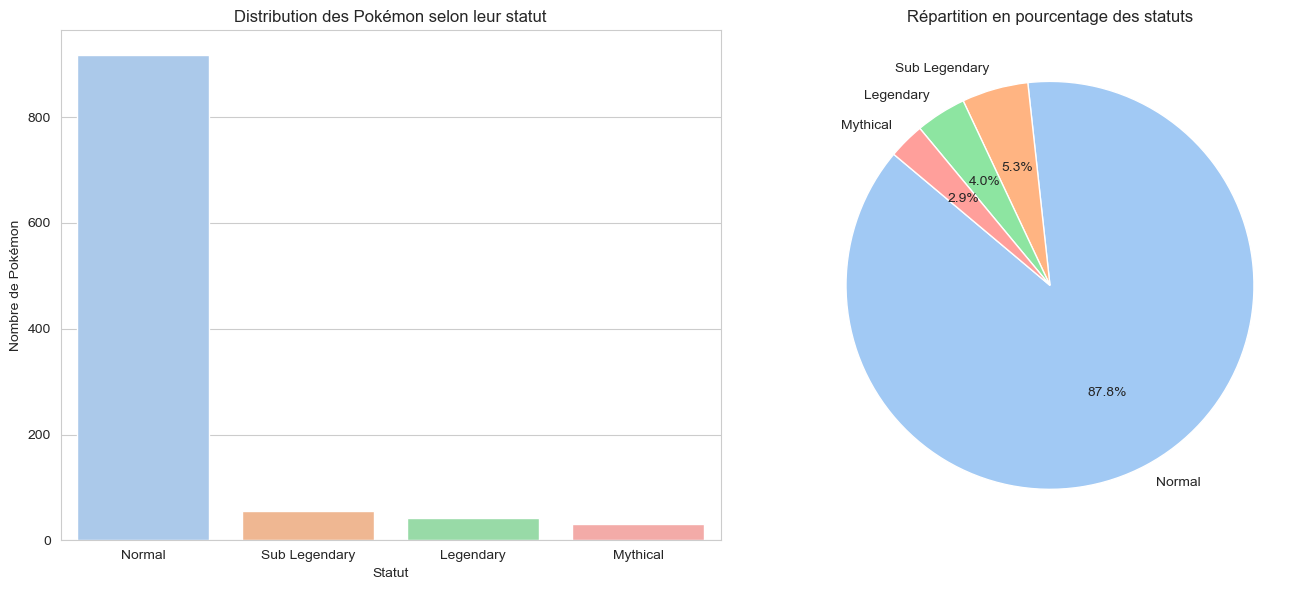

In [46]:
# Aperçu des valeurs uniques de la variable 'status'
status_counts = df['status'].value_counts()
display(status_counts)

# Création des visualisations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Barplot
sns.countplot(data=df, x='status', order=status_counts.index, palette='pastel', ax=axes[0])
axes[0].set_title("Distribution des Pokémon selon leur statut")
axes[0].set_ylabel("Nombre de Pokémon")
axes[0].set_xlabel("Statut")

# Camembert
axes[1].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
axes[1].set_title("Répartition en pourcentage des statuts")

plt.tight_layout()
plt.show()

### 📌 Analyse :
Voici la distribution de la variable status dans le dataset :

  - Normal : 918 Pokémon (≈ 88%)

  - Sub Legendary : 55 (≈ 5.3%)

  - Legendary : 42 (≈ 4%)

  - Mythical : 30 (≈ 2.9%)

> Cette répartition montre un fort déséquilibre entre les classes, ce qui sera un enjeu important à considérer pour la classification supervisée.

On remarque un fort déséquilibre de classes :

> Voici deux visualisations de la variable status :

  - 📊 Histogramme : montre clairement la prédominance des Pokémon de statut "Normal".

  - 🥧 Camembert : visualise la faible proportion de Pokémon "Legendary", "Mythical" et "Sub Legendary".



---

## 2️⃣ Boxplots des statistiques selon status
Nous allons maintenant examiner si les Pokémon "légendaires" se distinguent par leurs caractéristiques.

C:\Users\senou\AppData\Local\Temp\ipykernel_21096\3529521496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='pastel', ax=ax)
C:\Users\senou\AppData\Local\Temp\ipykernel_21096\3529521496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='pastel', ax=ax)
C:\Users\senou\AppData\Local\Temp\ipykernel_21096\3529521496.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='status', y=col, data=df, palette='pastel', ax=ax)
C:\Users\senou\AppData\Local\Temp\ipykernel_21096

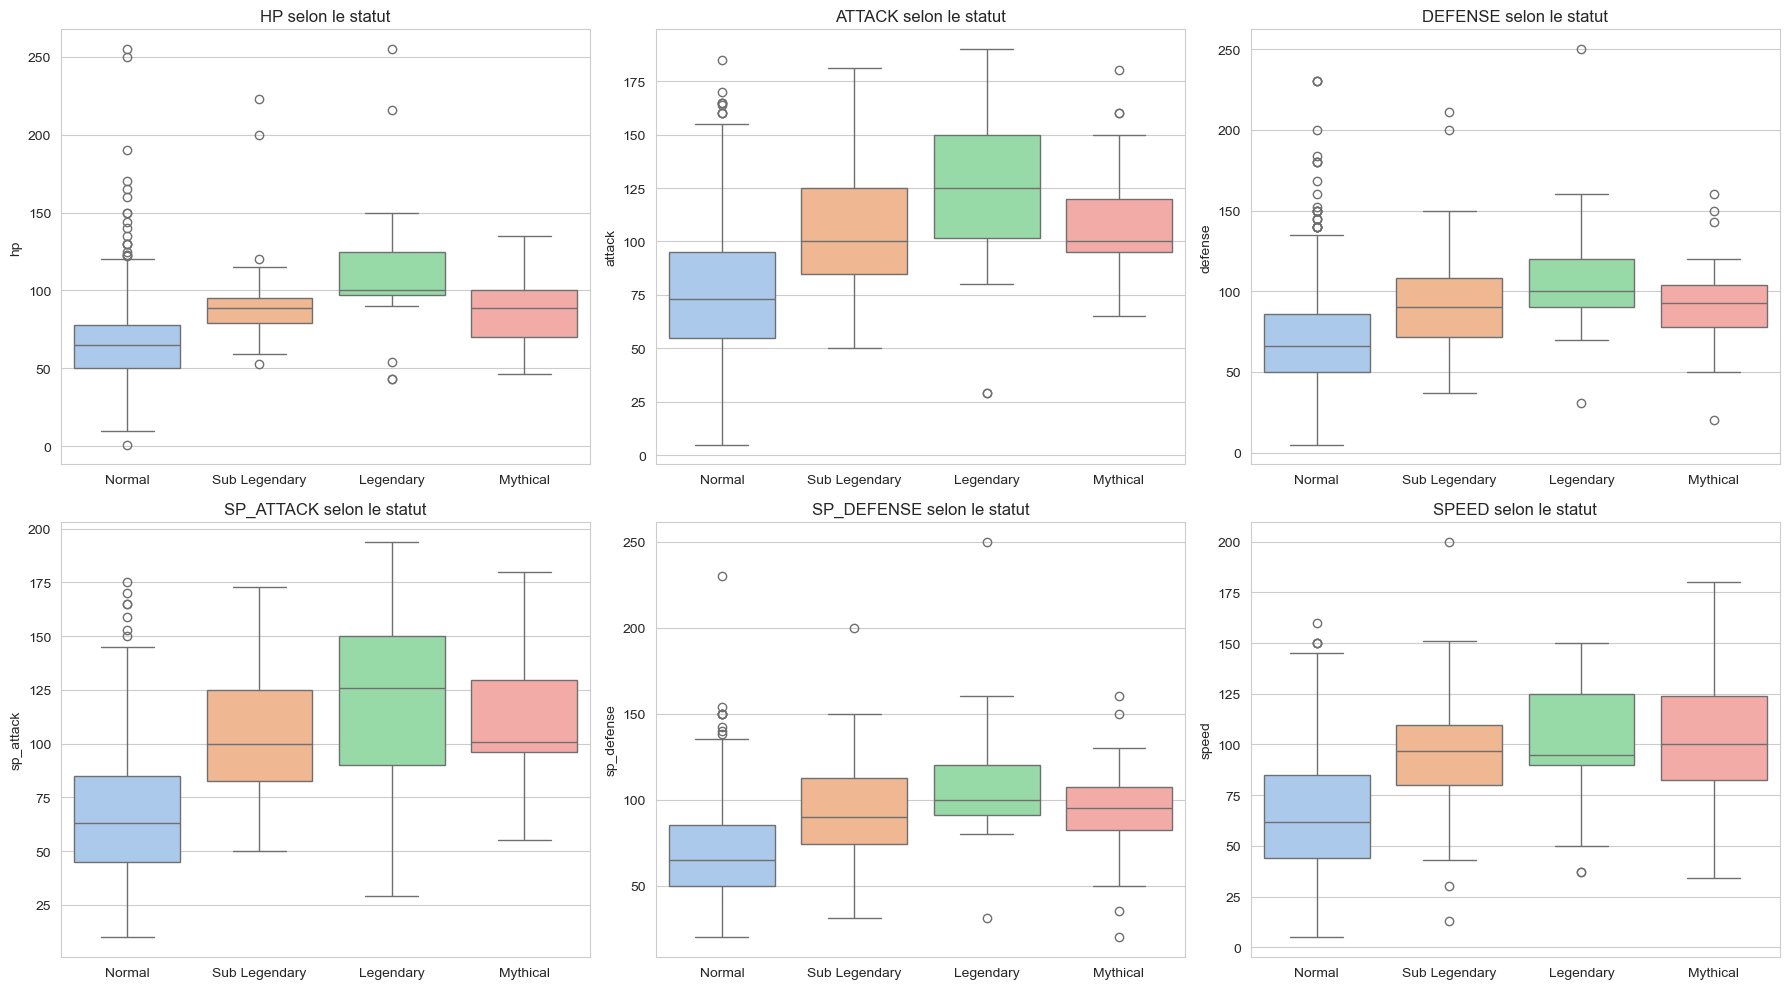

In [42]:
stats_vars = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, col in enumerate(stats_vars):
    ax = axes[i//3, i%3]
    sns.boxplot(x='status', y=col, data=df, palette='pastel', ax=ax)
    ax.set_title(f'{col.upper()} selon le statut')
    ax.set_xlabel('')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

### 📌 Analyse :

  - Les Pokémon Legendary et Mythical ont clairement des statistiques plus élevées.

  - Sub Legendary présente une tendance intermédiaire.

  - Ces différences justifient l'utilisation du status comme variable cible pour une tâche de classification.

---

## 3️⃣ Corrélations des statistiques numériques

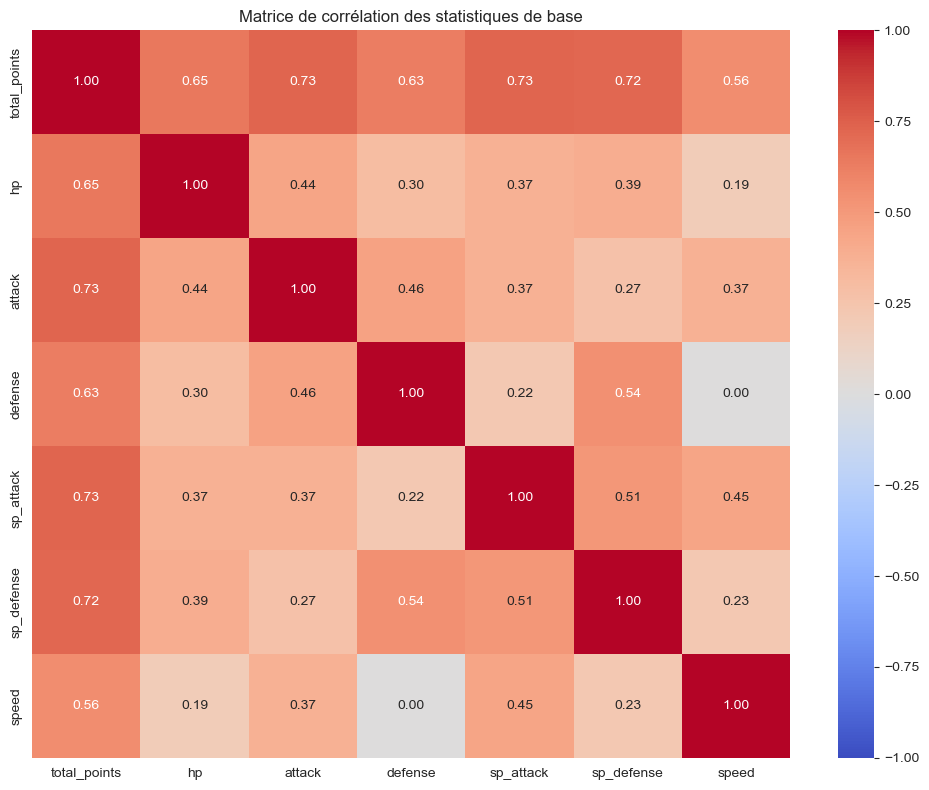

In [40]:
# Variables numériques d'intérêt
corr_vars = ['total_points', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']
corr_matrix = df[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de corrélation des statistiques de base")
plt.tight_layout()
plt.show()


### 📌 Analyse :

  - total_points est fortement corrélé à toutes les autres statistiques.

  - Faible corrélation entre defense et speed.

  - Cela nous aidera à choisir les bonnes variables explicatives pour la classification.
---